In [5]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
        'weight' : 'normal'}

matplotlib.rc('font', **font)
from afrc import AnalyticalFRC
import protfasta


In [8]:
def build_hist(indata, bin_width=1, max_x=60):
    
    bins = np.arange(0, max_x, bin_width)
    
    [counts, b] = np.histogram(indata, bins)
    plot_bins = (b+bin_width*0.5)[:-1]
    
    return (counts, plot_bins)

def plot_rg(rg_file, seq_file, outname, bin_width, mode='rg', max_x=100):
        
    fig = figure(num=None, figsize=(3, 1.5), dpi=150, facecolor='w', edgecolor='k')

    SAMPLE_SIZE=200000

    b = np.loadtxt(rg_file)
    seq = protfasta.read_fasta(seq_file,return_list=True)[0][1]

    n_vals = len(b)

    [counts, bins] = build_hist(b, max_x=max_x, bin_width=bin_width)
    
    if mode == 'rg':
        
        plt.bar(bins,counts, width=bins[1]-bins[0], color='red', alpha=0.3,edgecolor='k', linewidth=0.1)

        b = AnalyticalFRC(seq).sample_radius_of_gyration_distribution(SAMPLE_SIZE)
    elif mode == 're':
        
        plt.bar(bins,counts, width=bins[1]-bins[0], color='blue', alpha=0.3,edgecolor='k', linewidth=0.1)
        b = AnalyticalFRC(seq).sample_end_to_end_distribution(SAMPLE_SIZE)
        
    correction = n_vals/SAMPLE_SIZE
    [counts, bins] = build_hist(b, max_x=max_x, bin_width=bin_width)
    plt.plot(bins, counts*correction, color='k', linewidth=1.4)
    plt.yticks([])

    plt.tight_layout()
    plt.savefig(outname)


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


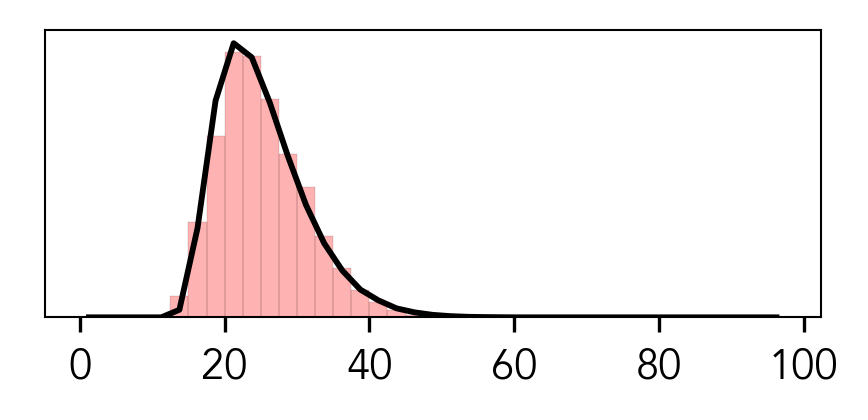

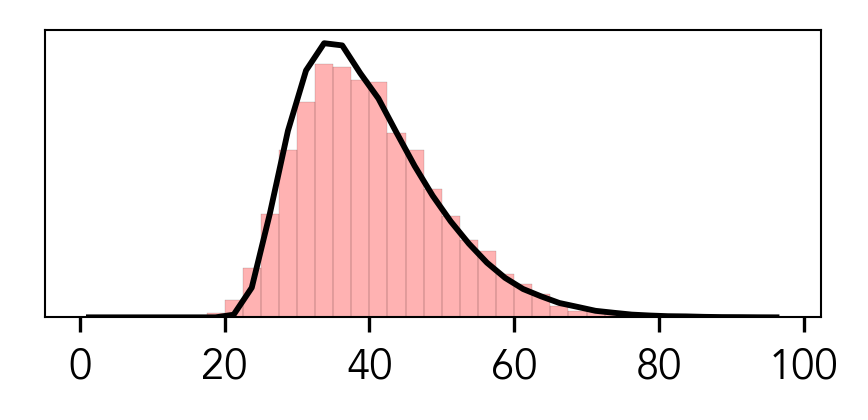

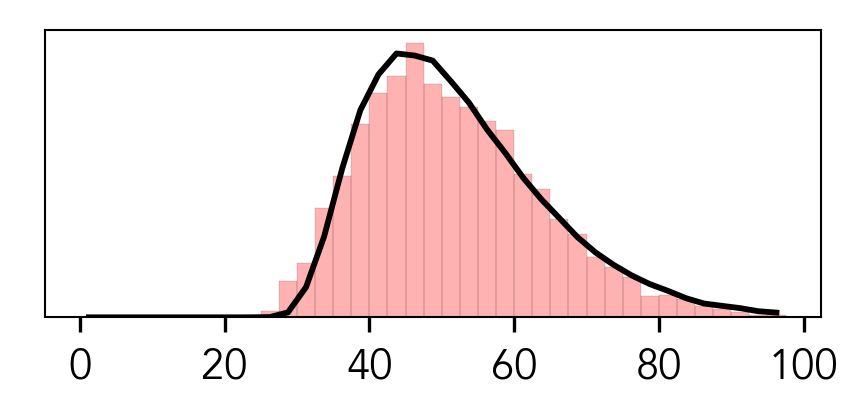

In [9]:
plot_rg(f'data/rg/frc_rg_K_100.csv', f'data/sequences/frc_seq_K_100.fasta', 'K100_RG.pdf', 2.5)
plot_rg(f'data/rg/frc_rg_A_250.csv', f'data/sequences/frc_seq_A_250.fasta', 'Q250_RG.pdf', 2.5)
plot_rg(f'data/rg/frc_rg_G_450.csv', f'data/sequences/frc_seq_G_450.fasta', 'G450_RG.pdf', 2.5)

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


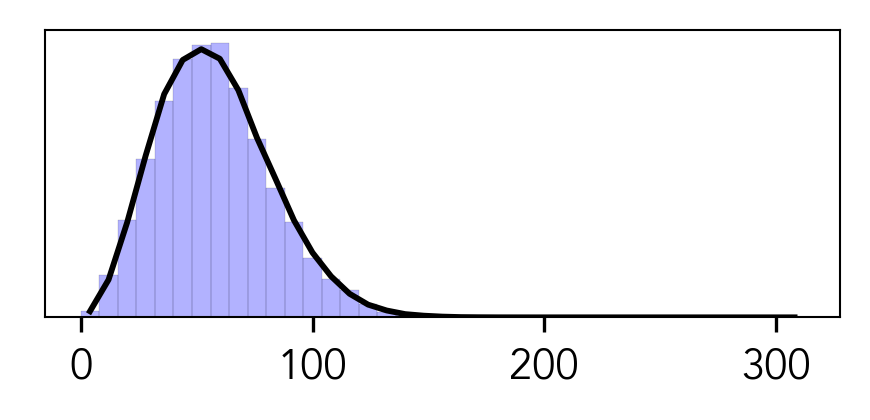

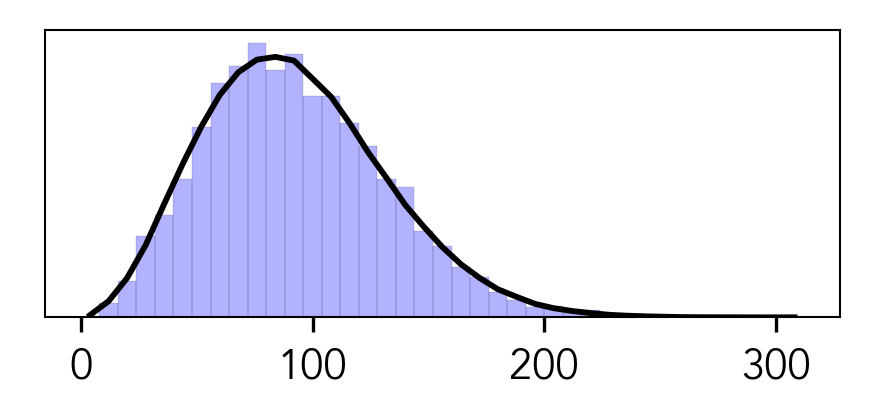

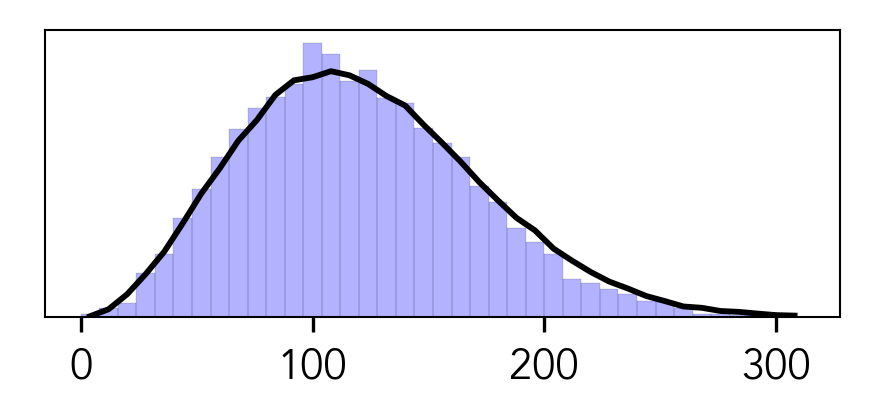

In [10]:
plot_rg(f'data/e2e/frc_e2e_K_100.csv', f'data/sequences/frc_seq_K_100.fasta', 'K100_RE.pdf', 8, mode='re', max_x=320)
plot_rg(f'data/e2e/frc_e2e_A_250.csv', f'data/sequences/frc_seq_A_250.fasta', 'Q250_RE.pdf', 8, mode='re', max_x=320)
plot_rg(f'data/e2e/frc_e2e_G_450.csv', f'data/sequences/frc_seq_G_450.fasta', 'G450_RE.pdf', 8, mode='re', max_x=320)